In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('../datasets/character.csv')

In [3]:
#region
print('\n____________ Dataset info ____________')
print(df.info())
print('\n____________ Some first data examples ____________')
print(df.head(20)) 
#endregion


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB
None

____________ Some first data examples ____________
    0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0   0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1   0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2   0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3   0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4   0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
5   0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
6   0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
7   0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
8   0    0    0    0    0    0  

In [4]:
#region
col = len(df.columns)
print(col)

785


In [5]:
#Tách các feature và label ra
X = np.array(df.iloc[:, 1: col])
y = np.array(df.iloc[:,0])
print(X.shape)

(372450, 784)


In [6]:
# Scale feature:
# Before scale: feature [0, 255] (0 là màu đen, 255 là màu trắng)
# After scale: feature [0,1] 
X = X.astype('float64')
X = X/255

In [7]:
# Hàm show image
def show_image(arr):
    arr = np.reshape(arr, (28, 28))
    plt.imshow(arr,cmap='gray')

In [8]:
#Lấy ra số lượng label
num_of_char = len(np.unique(y))
print(num_of_char)

26


In [9]:
# Khởi tạo train và test sets
X_train = np.array([])
y_train = np.array([])
X_test = np.array([])
y_test = np.array([])

In [10]:
def split_datasets(X, y, num, test_size):
    for i in range(num):
        X_char = X[y==i]            
        y_char = y[y==i]
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_char, y_char, test_size=test_size, random_state=42)
        if (i == 0):
            X_train, y_train, X_test, y_test =  X_train_temp, y_train_temp, X_test_temp, y_test_temp
            continue
        X_train = np.append(X_train, X_train_temp, axis=0)
        X_test = np.append(X_test, X_test_temp, axis=0)
        y_train = np.append(y_train, y_train_temp, axis=0)
        y_test = np.append(y_test, y_test_temp, axis=0)
    
    return (X_train, y_train, X_test, y_test)

In [11]:
(X_train, y_train, X_test, y_test) = split_datasets(X, y, num_of_char, test_size=0.2)
print('\n____________ Split training and test set ____________')     
print(len(X_train), "training +", len(X_test), "test samples")


____________ Split training and test set ____________
297950 training + 74500 test samples


In [18]:
new_run=True
sample_id = 253332

In [22]:
#region
# Try KNeighborsClassifier
if new_run:
    #Khởi tạo model
    knn = KNeighborsClassifier(n_neighbors=4, weights="distance")            #accuracy trên tập test 98%
    #Trainning model
    knn.fit(X_train,y_train)
    joblib.dump(knn,'../models/knn_clf')
else:
    knn= joblib.load('../models/knn_clf')

[20]
Label:  20
Label in character format:  u


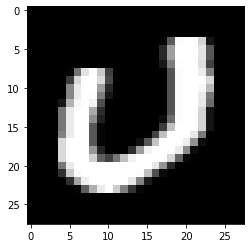

In [23]:
# Try prediction
sample_id = 253332
print(knn.predict([X_train[sample_id]]))
print('Label: ',y_train[sample_id])
print('Label in character format: ',chr(ord('a')+y_train[sample_id]))
show_image(X_train[sample_id])

In [24]:
# Try RandomForest classifier
new_run=True
if new_run == True:
    #Khởi tạo model
    rf_clf = RandomForestClassifier(n_estimators=20, random_state=42)       #accuracy trên tập test 98%
    #Trainning model
    rf_clf.fit(X_train, y_train)
    joblib.dump(rf_clf,'../models/rf_clf')
else:
    rf_clf = joblib.load('../models/rf_clf')

[20]
20
Label in character format:  u


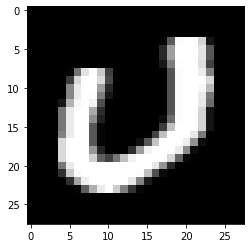

In [25]:
#In ra dự đoán
print(rf_clf.predict([X_train[sample_id]]))
#In ra label
print(y_train[sample_id])
print('Label in character format: ',chr(ord('a')+y_train[sample_id]))
show_image(X_train[sample_id])

In [16]:
#Try Softmax Regression
if new_run==True: 
    softmax_reg = LogisticRegression(multi_class="multinomial", # multinomial: use Softmax regression
                                 solver="saga",                 #Supported penalties: [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]
                                 random_state=42,
                                 penalty="elasticnet",          #using l1 and l2
                                 l1_ratio=0.1,                  #l1_ratio*l1 + (1-l1_ratio)*l2
                                 n_jobs=-1)
    softmax_reg.fit(X_train,y_train)
    joblib.dump(softmax_reg,'../models/softmax_reg')
else:
    softmax_reg=joblib.load('../models/softmax_reg')

c:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[20]
20
Label in character format:  u


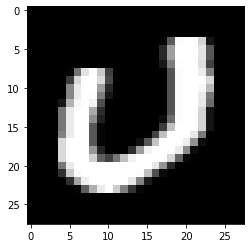

In [19]:
#In ra dự đoán
print(softmax_reg.predict([X_train[sample_id]]))
#In ra label
print(y_train[sample_id])
print('Label in character format: ',chr(ord('a')+y_train[sample_id]))
show_image(X_train[sample_id])

In [28]:
#Try SGD
#Khởi tạo model
if new_run==True:
    sgd_clf = SGDClassifier(loss='modified_huber',random_state=41)
    sgd_clf.fit(X_train,y_train)
    joblib.dump(sgd_clf,'../models/sgd_clf')
else:
    sgd_clf=joblib.load('../models/sgd_clf')

[20]
20
Label in character format:  u


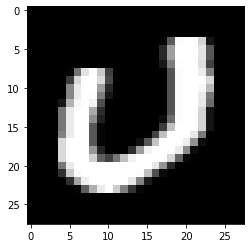

In [29]:
#In ra dự đoán
print(sgd_clf.predict([X_train[sample_id]]))
#In ra label
print(y_train[sample_id])
print('Label in character format: ',chr(ord('a')+y_train[sample_id]))
show_image(X_train[sample_id])

In [30]:
# Try Extra-Trees
new_run = True
if new_run:
    extra_trees = ExtraTreesClassifier(n_estimators=20, random_state=41)
    extra_trees.fit(X_train, y_train)
    joblib.dump(extra_trees, '../models/extra_tree_clf')
else:
    extra_trees = joblib.load('../models/extra_tree_clf')

[20]
20
Label in character format:  u


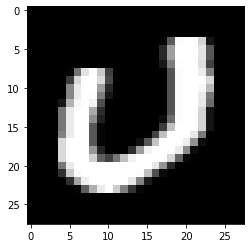

In [31]:
# In ra dự đoán
print(extra_trees.predict([X_train[sample_id]]))
# In ra label
print(y_train[sample_id])
print('Label in character format: ',chr(ord('a')+y_train[sample_id]))
show_image(X_train[sample_id])

In [32]:
# Try Decision Tree
new_run = True
if new_run:
    decision_tree = DecisionTreeClassifier(random_state=41)
    decision_tree.fit(X_train, y_train)
    joblib.dump(decision_tree, '../models/decision_tree_clf')
else:
    decision_tree = joblib.load('../models/decision_tree_clf')

[20]
20
Label in character format:  u


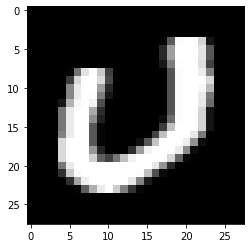

In [33]:
# In ra dự đoán
print(decision_tree.predict([X_train[sample_id]]))
# In ra label
print(y_train[sample_id])
print('Label in character format: ',chr(ord('a')+y_train[sample_id]))
show_image(X_train[sample_id])

In [34]:
# Evaluate on train set
test_train_set = False
if test_train_set:
    rf_train_score = accuracy_score(y_train, rf_clf.predict(X_train))
    knn_train_score = accuracy_score(y_train, knn.predict(X_train))
    softmax_train_score = accuracy_score(y_train, softmax_reg.predict(X_train))
    sgd_train_score = accuracy_score(y_train, sgd_clf.predict(X_train))
    extra_trees_train_score = accuracy_score(y_train, extra_trees.predict(X_train))
    decision_tree_train_score = accuracy_score(y_train, decision_tree.predict(X_train))

    print(f"Accuracy Score in Train Set with Random Forest is: {rf_train_score}")
    print(f"Accuracy Score in Train Set with KNN is: {knn_train_score}")
    print(f"Accuracy Score in Train Set with Softmax Regression is: {softmax_train_score}")
    print(f"Accuracy Score in Train Set with SGD Classification is: {sgd_train_score}")
    print(f"Accuracy Score in Train Set with Extra-Trees is: {extra_trees_train_score}")
    print(f"Accuracy Score in Train Set with Decision Tree is: {decision_tree_train_score}")

In [35]:
# Evaluate with cross validation
new_run_score=True
if new_run_score:
    knn_accuracies = cross_val_score(knn, X_train, y_train, cv=3, scoring="accuracy")
    rf_accuracies=cross_val_score(rf_clf,X_train,y_train,cv=3,scoring="accuracy")
    softmax_accuracies=cross_val_score(softmax_reg,X_train,y_train,cv=3,scoring="accuracy")
    sgd_accuracies=cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")
    extra_trees_accuracies = cross_val_score(extra_trees,X_train,y_train,cv=3,scoring="accuracy")
    decision_tree_accuracies = cross_val_score(decision_tree,X_train,y_train,cv=3,scoring="accuracy")
    
    joblib.dump(extra_trees_accuracies,'./saved_var/extra_trees_cross_val_score')
    joblib.dump(knn_accuracies,'./saved_var/knn_cross_val_score')
    joblib.dump(rf_accuracies,'./saved_var/rf_cross_val_score')
    joblib.dump(softmax_accuracies,'./saved_var/softmax_cross_val_score')
    joblib.dump(sgd_accuracies,'./saved_var/sgd_cross_val_score')
    joblib.dump(decision_tree_accuracies, './saved_var/decision_tree_cross_val_score')
else:
    knn_accuracies=joblib.load('./saved_var/knn_cross_val_score')
    rf_accuracies=joblib.load('./saved_var/rf_cross_val_score')
    softmax_accuracies=joblib.load('./saved_var/softmax_cross_val_score')
    sgd_accuracies=joblib.load('./saved_var/sgd_cross_val_score')
    extra_trees_accuracies = joblib.load('./saved_var/extra_trees_cross_val_score')
    decision_tree_accuracies = joblib.load('./saved_var/decision_tree_cross_val_score')
print('KNeighborsClassifier cross-validation score: ',knn_accuracies)
print('RandomForestClassifier cross-validation score: ',rf_accuracies)
print('SGDClassifier cross-validation score: ',sgd_accuracies)
print('Extra-Trees cross-validation score: ',extra_trees_accuracies)
print('Decision Tree cross-validation score: ',decision_tree_accuracies)
print('Softmax Regression cross-validation score: ',softmax_accuracies)

#endregion

c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nguye\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

KNeighborsClassifier cross-validation score:  [0.9727237  0.97170676 0.97207902]
RandomForestClassifier cross-validation score:  [0.97084084 0.96827331 0.96886705]
SGDClassifier cross-validation score:  [0.83936285 0.84058117 0.83667284]
Extra-Trees cross-validation score:  [0.97078043 0.96914929 0.96868581]
Decision Tree cross-validation score:  [0.91421408 0.91384154 0.91135366]
Softmax Regression cross-validation score:  [0.8801313  0.87913449 0.87737122]


In [36]:
#region
print('\n____________ Fine-tune models ____________')
def print_search_result(grid_search, model_name = ""): 
    print("\n====== Fine-tune " + model_name +" ======")
    print('Best hyperparameter combination: ',grid_search.best_params_)


____________ Fine-tune models ____________


In [37]:
# Random Forest
rf_param_grid = {
    'n_estimators': [30, 35, 45]
}

rf_clf_tune = GridSearchCV(
    estimator=RandomForestClassifier(random_state=41),
    param_grid=rf_param_grid
)


rf_clf_tune.fit(X_train, y_train)
print_search_result(rf_clf_tune, "Random Forest Classifier")


====== Fine-tune Random Forest Classifier ======
Best hyperparameter combination:  {'n_estimators': 45}


In [38]:
extra_trees_param_grid = {
    'n_estimators': [40, 45, 50]
}

extra_trees_tune = GridSearchCV(
    estimator=ExtraTreesClassifier(random_state=41),
    param_grid=extra_trees_param_grid
)

extra_trees_tune.fit(X_train, y_train)
print_search_result(extra_trees_tune, "Extra-Trees Classifer")


====== Fine-tune Extra-Trees Classifer ======
Best hyperparameter combination:  {'n_estimators': 50}


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [41]:
voting_clf = VotingClassifier(
    estimators=[('knn', KNeighborsClassifier(n_neighbors=4, weights='distance')),
                ('random-forest', RandomForestClassifier(n_estimators=45, random_state=41)),
                ('extra-trees', ExtraTreesClassifier(n_estimators=50))],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_neighbors=4,
                                                   weights='distance')),
                             ('random-forest',
                              RandomForestClassifier(n_estimators=45,
                                                     random_state=41)),
                             ('extra-trees',
                              ExtraTreesClassifier(n_estimators=50))],
                 voting='soft')

In [42]:
voting_clf2 = VotingClassifier(
    estimators=[
        ('random-forest', RandomForestClassifier(n_estimators=45, random_state=41)),
        ('extra-trees', ExtraTreesClassifier(n_estimators=50))
    ],
    voting='soft'
)
voting_clf2.fit(X_train, y_train)

VotingClassifier(estimators=[('random-forest',
                              RandomForestClassifier(n_estimators=45,
                                                     random_state=41)),
                             ('extra-trees',
                              ExtraTreesClassifier(n_estimators=50))],
                 voting='soft')

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [45]:
bagging_clf = BaggingClassifier(
    base_estimator=RandomForestClassifier(n_estimators=45, random_state=41),
    n_estimators=4
)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=45,
                                                        random_state=41),
                  n_estimators=4)

In [47]:
stacking_clf = StackingClassifier(
    estimators=[('knn', KNeighborsClassifier(n_neighbors=4, weights='distance')),
                ('extra-trees', ExtraTreesClassifier(n_estimators=50))],
    final_estimator=RandomForestClassifier(n_estimators=45, random_state=41)
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(n_neighbors=4,
                                                     weights='distance')),
                               ('extra-trees',
                                ExtraTreesClassifier(n_estimators=50))],
                   final_estimator=RandomForestClassifier(n_estimators=45,
                                                          random_state=41))

In [48]:
joblib.dump(voting_clf, '../models/voting_clf')

['../models/voting_clf']

In [49]:
joblib.dump(voting_clf2, '../models/voting_clf2')

['../models/voting_clf2']

In [50]:
joblib.dump(bagging_clf, '../models/bagging_clf')

['../models/bagging_clf']

In [51]:
joblib.dump(stacking_clf, '../models/stacking_clf')

['../models/stacking_clf']

In [53]:
def show_result_model(real_label, predict):
    print(accuracy_score(real_label, predict))
    error_matrix=confusion_matrix(real_label,predict)
    plt.matshow(error_matrix, cmap=plt.cm.seismic)
    plt.xlabel("Prediction")
    plt.ylabel("Actual class")
    plt.colorbar()
    plt.show()

0.9844161073825504


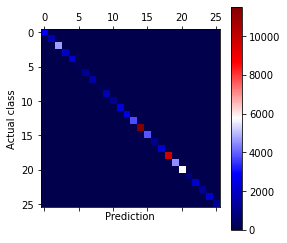

In [54]:
# ==================== Base model =================
# KNN
show_result_model(y_test,knn.predict(X_test))

0.9831140939597316


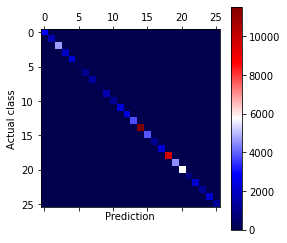

In [55]:
# Random Forest
show_result_model(y_test, rf_clf.predict(X_test))

0.8793288590604027


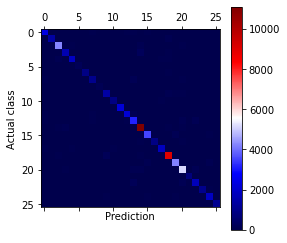

In [56]:
# Softmax Regression
show_result_model(y_test, softmax_reg.predict(X_test))

0.9520939597315436


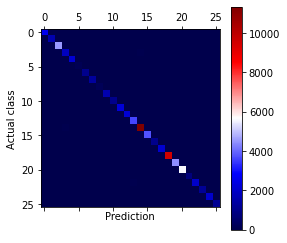

In [57]:
# Decision Tree
show_result_model(y_test, decision_tree.predict(X_test))

0.9828993288590604


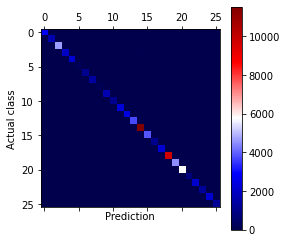

In [58]:
# Extra-trees 
show_result_model(y_test, extra_trees.predict(X_test))

0.8259328859060403


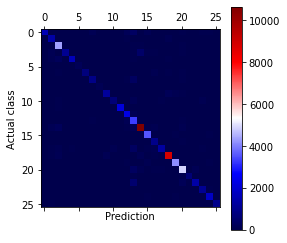

In [59]:
# SGD
show_result_model(y_test, sgd_clf.predict(X_test))

In [60]:
# ================= Tuned Model =================

0.9852348993288591


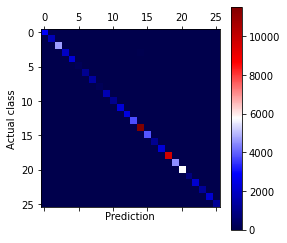

In [61]:
# Random Forest Tuned
show_result_model(y_test, rf_clf_tune.predict(X_test))

0.9855436241610738


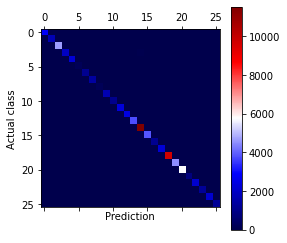

In [62]:
# Extra-Trees Tuned
show_result_model(y_test, extra_trees_tune.predict(X_test))

In [63]:
# ========== Ensemble Model ============

0.9873288590604027


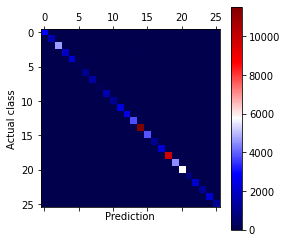

In [64]:
# Voting Classifier with KNN, Random Forest and Extra-trees
show_result_model(y_test, voting_clf.predict(X_test))

0.9862684563758389


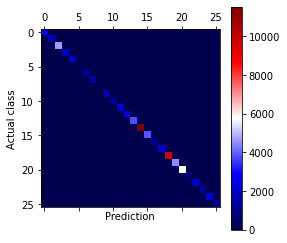

In [65]:
# Voting Classifier with Random Forest and Extra-trees
show_result_model(y_test, voting_clf2.predict(X_test))

0.9818120805369127


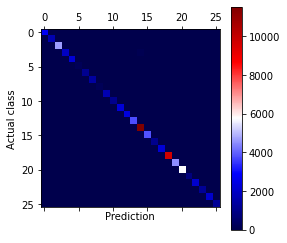

In [66]:
# Bagging with 4 estimators of Random Forest
show_result_model(y_test, bagging_clf.predict(X_test))

0.9905771812080537


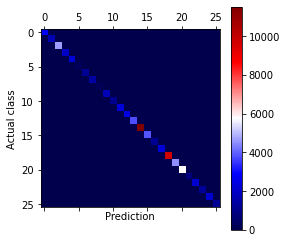

In [67]:
# Stacking with layer 0 is KNN and Extra-trees and final layer is Random Forest
show_result_model(y_test, stacking_clf.predict(X_test))

In [37]:
# ==================== Choose Model ================
# Best Model On Test Set: Stacking Classification
# Code: 
''' 
stacking_clf = StackingClassifier(
    estimators=[('knn', KNeighborsClassifier(n_neighbors=4, weights='distance')),
                ('extra-trees', ExtraTreesClassifier(n_estimators=50))],
    final_estimator=RandomForestClassifier(n_estimators=45, random_state=41)
) 
'''

# Best Model On Test Set an Good about Time Prediction: Voting Classification with Random Forest and Extra-Trees
# Code: 
''' 
voting_clf2 = VotingClassifier(
    estimators=[
        ('random-forest', RandomForestClassifier(n_estimators=45, random_state=41)),
        ('extra-trees', ExtraTreesClassifier(n_estimators=50))
    ],
    voting='soft'
) 
'''

" \nstacking_clf = StackingClassifier(\n    estimators=[('knn', KNeighborsClassifier(n_neighbors=4, weights='distance')),\n                ('extra-trees', ExtraTreesClassifier(n_estimators=50))],\n    final_estimator=RandomForestClassifier(n_estimators=45, random_state=41)\n) \n"

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2052\540147610.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tight_layout" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("figs/confusion_matrix_errors_plot", tight_layout=False)


<Figure size 7200x7200 with 0 Axes>

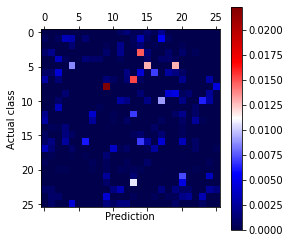

In [20]:
#==================== Plot error confusion matrix ================
import matplotlib as mpl
stacking_clf=joblib.load('../models/stacking_clf')
y_test_pred_result=stacking_clf.predict(X_test)
conf_mat=confusion_matrix(y_test,y_test_pred_result)
#Tính tổng theo từng hàng
row_sums = conf_mat.sum(axis=1, keepdims=True)
#Chuyển thành đơn vị tỉ lệ 0% --> 100% (chia theo từng row)
norm_conf_mat = conf_mat / row_sums
# Replace rates on diagonal (correct classifitions) by zeros  
#Gán giá trị cho đường chéo chính = 0
np.fill_diagonal(norm_conf_mat, 0)
plt.figure(figsize=(25, 25))
plt.matshow(norm_conf_mat,cmap=plt.cm.seismic)
plt.xlabel("Prediction")
plt.ylabel("Actual class")
plt.colorbar()
plt.savefig("figs/confusion_matrix_errors_plot", tight_layout=False)
plt.show()

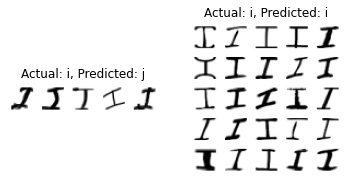

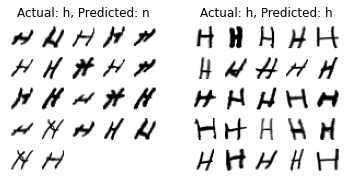

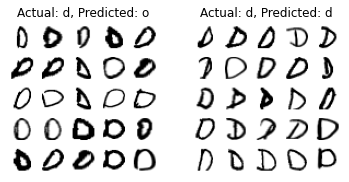

In [36]:
#==================== Plot examples of error predict ================
def plot_character(instances, images_per_row=10, **options):
    size = 28        #img size=28*28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
# Sau khi quan sát errors confusion matrix, ta phát hiện:
# 8 bị dự đoán thành 9
# 7 bị dự đoán thành 13
# 3 bị dự doán thành 14
class_3 = 3
class_7 = 7
class_8 = 8             
class_9 = 9
class_13 = 13
class_14 = 14
#Lấy ra các index của các sample trên tập test mà dự đoán sai             
X_class_89 = X_test[(y_test == class_8) & (y_test_pred_result == class_9)]
X_class_88 = X_test[(y_test == class_8) & (y_test_pred_result == class_8)]
X_class_713 = X_test[(y_test == class_7) & (y_test_pred_result == class_13)]
X_class_77 = X_test[(y_test == class_7) & (y_test_pred_result == class_7)]
X_class_314= X_test[(y_test == class_3) & (y_test_pred_result == class_14)]
X_class_33= X_test[(y_test == class_3) & (y_test_pred_result == class_3)]
#Vẽ ra các sample bị dự đoán sai và các sample dự đoán đúng    
plt.figure(figsize=(6,7))
plt.subplot(221); plot_character(X_class_89[0:25], images_per_row=5)
plt.title("Actual: " + chr(ord('a')+class_8) + ", Predicted: " + chr(ord('a')+class_9))
plt.subplot(222); plot_character(X_class_88[0:25], images_per_row=5)
plt.title("Actual: " + chr(ord('a')+class_8) + ", Predicted: " + chr(ord('a')+class_8))
plt.show()
plt.figure(figsize=(6,7))
plt.subplot(221); plot_character(X_class_713[0:25], images_per_row=5)
plt.title("Actual: " + chr(ord('a')+class_7) + ", Predicted: " + chr(ord('a')+class_13))
plt.subplot(222); plot_character(X_class_77[0:25], images_per_row=5)
plt.title("Actual: " + chr(ord('a')+class_7) + ", Predicted: " + chr(ord('a')+class_7))
plt.show()
plt.figure(figsize=(6,7))
plt.subplot(221); plot_character(X_class_314[0:25], images_per_row=5)
plt.title("Actual: " + chr(ord('a')+class_3) + ", Predicted: " + chr(ord('a')+class_14))
plt.subplot(222); plot_character(X_class_33[0:25], images_per_row=5)
plt.title("Actual: " + chr(ord('a')+class_3) + ", Predicted: " + chr(ord('a')+class_3))
plt.show()

In [44]:
import math 
test_size_i=X_test[y_test == class_8]
print(test_size_i.shape[0])                            #Trong tập test: label i chỉ chiếm 224 sample
#Vì vậy mặc dù % sai là nhiều nhất nhưng số lượng sample lại rất ít
print(math.ceil(test_size_i.shape[0]*0.02))            #~ 5 sample

224
5


In [69]:
# ----------------------------------------DONE---------------------------------------
# DATASETS LINK:
# https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format


# REFERENCE LINKS:
# https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
# https://github.com/ageron/handson-ml2/blob/master/03_classification.ipynb